Author: Utpal Kumar

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.io as sio
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
from matplotlib import style
style.use('ggplot')	

In [53]:
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer

can download more data from this github link
https://vincentarelbundock.github.io/Rdatasets/datasets.html

In [54]:
df= pd.read_csv("bfi.csv")

# 25 Personality items representing 5 factors
## Description
25 personality self report items taken from the International Personality Item Pool (ipip.ori.org) were included as part of the Synthetic Aperture Personality Assessment (SAPA) web based personality assessment project. The data from 2800 subjects are included here as a demonstration set for scale construction, factor analysis, and Item Response Theory analysis. Three additional demographic variables (sex, education, and age) are also included.

Usage
data(bfi)
data(bfi.dictionary)
Format
A data frame with 2800 observations on the following 28 variables. (The q numbers are the SAPA item numbers).

A1
Am indifferent to the feelings of others. (q_146)

A2
Inquire about others' well-being. (q_1162)

A3
Know how to comfort others. (q_1206)

A4
Love children. (q_1364)

A5
Make people feel at ease. (q_1419)

C1
Am exacting in my work. (q_124)

C2
Continue until everything is perfect. (q_530)

C3
Do things according to a plan. (q_619)

C4
Do things in a half-way manner. (q_626)

C5
Waste my time. (q_1949)

E1
Don't talk a lot. (q_712)

E2
Find it difficult to approach others. (q_901)

E3
Know how to captivate people. (q_1205)

E4
Make friends easily. (q_1410)

E5
Take charge. (q_1768)

N1
Get angry easily. (q_952)

N2
Get irritated easily. (q_974)

N3
Have frequent mood swings. (q_1099

N4
Often feel blue. (q_1479)

N5
Panic easily. (q_1505)

O1
Am full of ideas. (q_128)

O2
Avoid difficult reading material.(q_316)

O3
Carry the conversation to a higher level. (q_492)

O4
Spend time reflecting on things. (q_1738)

O5
Will not probe deeply into a subject. (q_1964)

gender
Males = 1, Females =2

education
1 = HS, 2 = finished HS, 3 = some college, 4 = college graduate 5 = graduate degree

age
age in years

Details
The first 25 items are organized by five putative factors: Agreeableness, Conscientiousness, Extraversion, Neuroticism, and Opennness. The scoring key is created using make.keys, the scores are found using score.items.

These five factors are a useful example of using irt.fa to do Item Response Theory based latent factor analysis of the polychoric correlation matrix. The endorsement plots for each item, as well as the item information functions reveal that the items differ in their quality.

The item data were collected using a 6 point response scale: 1 Very Inaccurate 2 Moderately Inaccurate 3 Slightly Inaccurate 4 Slightly Accurate 5 Moderately Accurate 6 Very Accurate

as part of the Synthetic Apeture Personality Assessment (SAPA https://sapa-project.org) project. To see an example of the data collection technique, visit https://SAPA-project.org or the International Cognitive Ability Resource at https://icar-project.com. The items given were sampled from the International Personality Item Pool of Lewis Goldberg using the sampling technique of SAPA. This is a sample data set taken from the much larger SAPA data bank.

Note
The bfi data set and items should not be confused with the BFI (Big Five Inventory) of Oliver John and colleagues (John, O. P., Donahue, E. M., & Kentle, R. L. (1991). The Big Five Inventory–Versions 4a and 54. Berkeley, CA: University of California,Berkeley, Institute of Personality and Social Research.)

Source
The items are from the ipip (Goldberg, 1999). The data are from the SAPA project (Revelle, Wilt and Rosenthal, 2010) , collected Spring, 2010 ( https://sapa-project.org).

References
Goldberg, L.R. (1999) A broad-bandwidth, public domain, personality inventory measuring the lower-level facets of several five-factor models. In Mervielde, I. and Deary, I. and De Fruyt, F. and Ostendorf, F. (eds) Personality psychology in Europe. 7. Tilburg University Press. Tilburg, The Netherlands.

Revelle, W., Wilt, J., and Rosenthal, A. (2010) Individual Differences in Cognition: New Methods for examining the Personality-Cognition Link In Gruszka, A. and Matthews, G. and Szymura, B. (Eds.) Handbook of Individual Differences in Cognition: Attention, Memory and Executive Control, Springer.

Revelle, W, Condon, D.M., Wilt, J., French, J.A., Brown, A., and Elleman, L.G. (2016) Web and phone based data collection using planned missing designs. In Fielding, N.G., Lee, R.M. and Blank, G. (Eds). SAGE Handbook of Online Research Methods (2nd Ed), Sage Publcations.

See Also
bi.bars to show the data by age and gender, irt.fa for item factor analysis applying the irt model.

Examples
data(bfi)
describe(bfi)
 
 keys.list <-
  list(agree=c("-A1","A2","A3","A4","A5"),conscientious=c("C1","C2","C3","-C4","-C5"),
extraversion=c("-E1","-E2","E3","E4","E5"),neuroticism=c("N1","N2","N3","N4","N5"),
openness = c("O1","-O2","O3","O4","-O5")) 
 scores <- scoreItems(keys.list,bfi,min=1,max=6) #specify the minimum and maximum values
 scores
 #show the use of the fa.lookup with a dictionary
 keys.lookup(keys.list,bfi.dictionary[,1:4])
 

In [55]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [56]:
df.shape

(2800, 29)

In [57]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [58]:
df.drop(['Unnamed: 0','gender', 'education', 'age'],axis=1,inplace=True)

In [59]:
# Dropping missing values rows
df.dropna(inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2436 entries, 0 to 2799
Data columns (total 25 columns):
A1    2436 non-null float64
A2    2436 non-null float64
A3    2436 non-null float64
A4    2436 non-null float64
A5    2436 non-null float64
C1    2436 non-null float64
C2    2436 non-null float64
C3    2436 non-null float64
C4    2436 non-null float64
C5    2436 non-null float64
E1    2436 non-null float64
E2    2436 non-null float64
E3    2436 non-null float64
E4    2436 non-null float64
E5    2436 non-null float64
N1    2436 non-null float64
N2    2436 non-null float64
N3    2436 non-null float64
N4    2436 non-null float64
N5    2436 non-null float64
O1    2436 non-null float64
O2    2436 non-null int64
O3    2436 non-null float64
O4    2436 non-null float64
O5    2436 non-null float64
dtypes: float64(24), int64(1)
memory usage: 494.8 KB


In [61]:
df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


# Adequacy Test
Before you perform factor analysis, you need to evaluate the “factorability” of our dataset. Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:
- Bartlett’s Test

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [62]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18146.065577234804, 0.0)

In this Bartlett ’s test, the p-value is 0. The test was statistically significant, indicating that the observed correlation matrix is not an identity matrix.

- Kaiser-Meyer-Olkin (KMO) Test 

measures the suitability of data for factor analysis. It determines the adequacy for each observed variable and for the complete model. KMO estimates the proportion of variance among all the observed variable. Lower proportion id more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [63]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8486452309468382

# Choosing the Number of Factors
For choosing the number of factors, you can use the Kaiser criterion and scree plot. Both are based on eigenvalues.

In [64]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 25, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,5.134311
1,2.751887
2,2.142702
3,1.852328
4,1.548163
5,1.073582
6,0.839539
7,0.799206
8,0.718989
9,0.688089


Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

Text(0, 0.5, 'Eigenvalue')

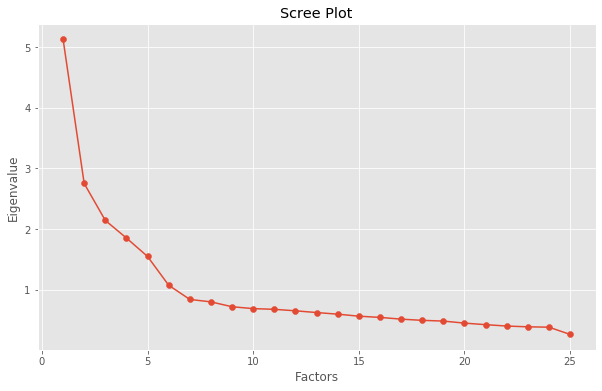

In [65]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev.values)
plt.plot(range(1,df.shape[1]+1),ev.values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')

Here, you can see only for 6-factors eigenvalues are greater than one. It means we need to choose only 6 factors (or unobserved variables).

In [66]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(df, 6, rotation="varimax")

In [67]:
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,0.040783,0.095220,0.048734,-0.113057,-0.530987,0.161216
A2,0.235538,0.033131,0.133714,0.063734,0.661141,-0.006244
A3,0.343008,-0.009621,0.121353,0.033990,0.605933,0.160106
A4,0.219717,-0.081518,0.235140,-0.125338,0.404594,0.086356
A5,0.414458,-0.149616,0.106382,0.030977,0.469698,0.236519
C1,0.077248,-0.004358,0.554582,0.190124,0.007511,0.095035
C2,0.038370,0.068330,0.674545,0.087593,0.057055,0.152775
C3,0.031867,-0.039994,0.551164,-0.011338,0.101282,0.008996
C4,-0.066241,0.216283,-0.638475,-0.143846,-0.102617,0.318359
C5,-0.180812,0.284187,-0.544838,0.025837,-0.059955,0.132423


In [68]:
fa.loadings.shape

(25, 6)

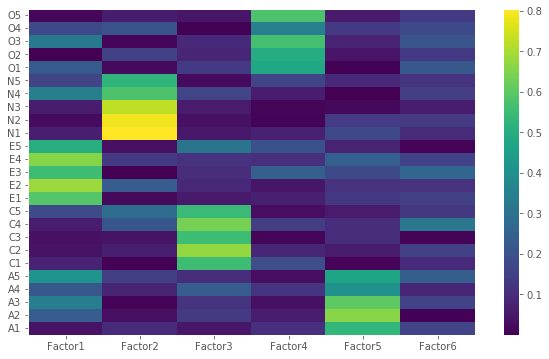

In [69]:
Z=np.abs(fa.loadings)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings.shape[1])+0.5, minor=False)
ax.set_yticklabels(fa.loadings.index.values)
ax.set_xticklabels(fa.loadings.columns.values)
plt.show()

- Factor 1 has high factor loadings for E1,E2,E3,E4, and E5 (Extraversion)
- Factor 2 has high factor loadings for N1,N2,N3,N4, and N5 (Neuroticism)
- Factor 3 has high factor loadings for C1,C2,C3,C4, and C5 (Conscientiousness)
- Factor 4 has high factor loadings for O1,O2,O3,O4, and O5 (Opennness)
- Factor 5 has high factor loadings for A1,A2,A3,A4, and A5 (Agreeableness)
- Factor 6 has none of the high loagings for any variable and is not easily interpretable. Its good if we take only five factors.

In [70]:
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer()
fa.analyze(df, 5, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5
A1,0.040465,0.111126,0.022798,-0.077931,-0.428166
A2,0.213716,0.029588,0.139037,0.062139,0.626946
A3,0.317848,0.009357,0.109331,0.056196,0.650743
A4,0.204566,-0.066476,0.230584,-0.112700,0.435624
A5,0.393034,-0.122113,0.087869,0.066708,0.537087
C1,0.070184,0.010416,0.545824,0.209584,0.038878
C2,0.033270,0.089574,0.648731,0.115434,0.102782
C3,0.023907,-0.030855,0.557036,-0.005183,0.111578
C4,-0.064984,0.240410,-0.633806,-0.107535,-0.037498
C5,-0.176395,0.290318,-0.562467,0.036822,-0.047525


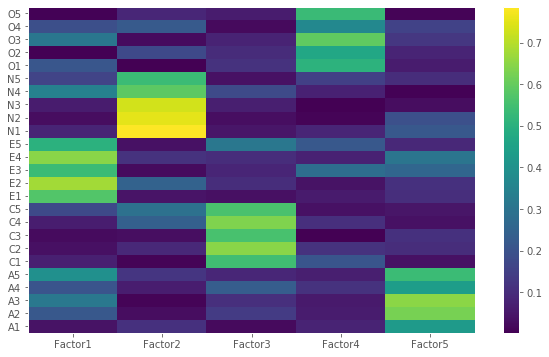

In [71]:
Z=np.abs(fa.loadings)
fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks(np.arange(fa.loadings.shape[0])+0.5, minor=False)
ax.set_xticks(np.arange(fa.loadings.shape[1])+0.5, minor=False)
ax.set_yticklabels(fa.loadings.index.values)
ax.set_xticklabels(fa.loadings.columns.values)
plt.show()

In [72]:
# Get variance of each factors
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5
SS Loadings,2.473090,2.709633,2.041106,1.522153,1.844498
Proportion Var,0.098924,0.108385,0.081644,0.060886,0.073780
Cumulative Var,0.098924,0.207309,0.288953,0.349839,0.423619


Total 42% cumulative Variance explained by the 5 factors.

Factor analysis explores large dataset and finds interlinked associations. It reduces the observed variables into a few unobserved variables or identifies the groups of inter-related variables, which help the researchers to compress situations and find the hidden relationship. Also, It helps in improve questionnaire in for future surveys. Factors make for more natural data interpretation.